In [120]:
import tensorflow as tf

In [121]:
import matplotlib.pyplot as plt

In [122]:
import random

In [123]:
from tensorflow.examples.tutorials.mnist import input_data

In [124]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [125]:
import matplotlib.ticker as tick

import numpy as np

In [126]:
%matplotlib inline

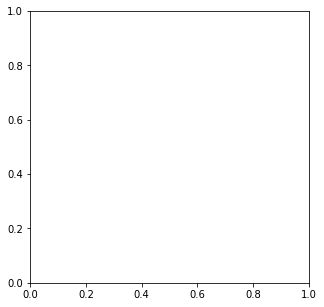

In [127]:
nrows,ncols = 28,28
fig, ax = plt.subplots(figsize=(5,5))

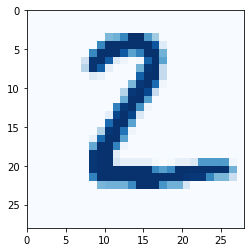

In [128]:
plt.imshow(mnist.test.images[1].reshape(nrows,ncols),cmap='Blues',interpolation='nearest', extent = (0, ncols, nrows, 0))

plt.show()


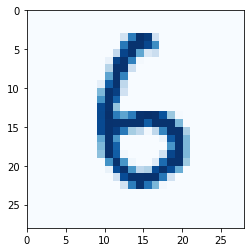

In [129]:
plt.imshow(mnist.test.images[21].reshape(nrows,ncols),cmap='Blues',interpolation='nearest', extent = (0, ncols, nrows, 0))

plt.show()


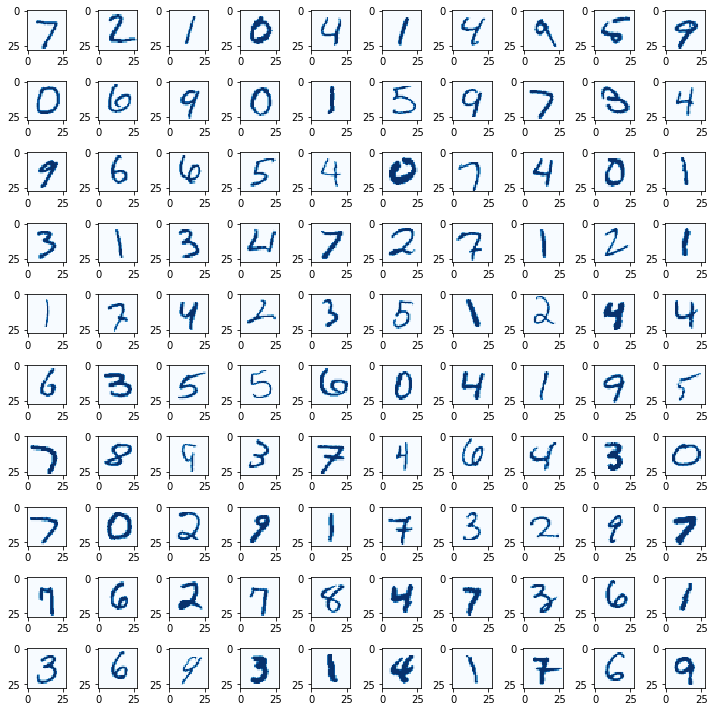

In [103]:
plt.figure(figsize=(10,10))
for n in range(100):
    plt.subplot(10,10,n+1)
    plt.imshow(mnist.test.images[n].reshape(nrows,ncols),cmap='Blues',interpolation='nearest')
plt.tight_layout()
plt.show()

In [104]:
nb_classes = 10

In [105]:
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,nb_classes])

In [106]:
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [107]:
hypothesis=tf.nn.softmax(tf.matmul(X,W)+b)

In [108]:
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [109]:
is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [110]:
training_epochs=50
batch_size=100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs) :
        avg_cost = 0
        total_batch=int(mnist.train.num_examples/batch_size)
        for i in range(total_batch) :
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost+= c/total_batch
        print('Epoch:','%04d'%(epoch+1),
             'cost = ','{:.9f}'.format(avg_cost))
    print('Learning finished')

Epoch: 0001 cost =  3.006271678
Epoch: 0002 cost =  1.067896956
Epoch: 0003 cost =  0.843685817
Epoch: 0004 cost =  0.737926205
Epoch: 0005 cost =  0.671994123
Epoch: 0006 cost =  0.626753568
Epoch: 0007 cost =  0.592500713
Epoch: 0008 cost =  0.565415565
Epoch: 0009 cost =  0.543474051
Epoch: 0010 cost =  0.525140367
Epoch: 0011 cost =  0.509465827
Epoch: 0012 cost =  0.496074608
Epoch: 0013 cost =  0.483575844
Epoch: 0014 cost =  0.472632793
Epoch: 0015 cost =  0.462795679
Epoch: 0016 cost =  0.454140148
Epoch: 0017 cost =  0.445878119
Epoch: 0018 cost =  0.438211061
Epoch: 0019 cost =  0.431007897
Epoch: 0020 cost =  0.424842286
Epoch: 0021 cost =  0.418563566
Epoch: 0022 cost =  0.412735154
Epoch: 0023 cost =  0.407681637
Epoch: 0024 cost =  0.402421588
Epoch: 0025 cost =  0.397476861
Epoch: 0026 cost =  0.393332019
Epoch: 0027 cost =  0.389025858
Epoch: 0028 cost =  0.385220786
Epoch: 0029 cost =  0.381180623
Epoch: 0030 cost =  0.377430197
Epoch: 0031 cost =  0.374013004
Epoch: 0

In [111]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Accuracy : ",accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Accuracy :  0.087


In [130]:
 with tf.Session() as sess:
    r=random.randint(0,mnist.test.num_examples-1)
    print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))

Label:  [2]


In [131]:
 with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    print("Prediction: ",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

Prediction:  [9]


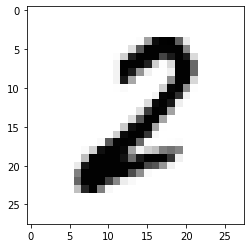

In [132]:
    plt.imshow(
    mnist.test.images[r:r+1].reshape(28,28),
    cmap='Greys',
    interpolation='nearest')
    plt.show()    
   

In [116]:
     plt.imshow(
     mnist.validation.images[r:r+1].reshape(28,28),
     cmap='Greys',
    interpolation='nearest')
 
  

ValueError: cannot reshape array of size 0 into shape (28,28)